In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import keras as ks
#from keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0


In [29]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = ks.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
train_images.shape
len(train_labels)

60000

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
test_images.shape



10000

In [36]:
len(test_labels)

10000

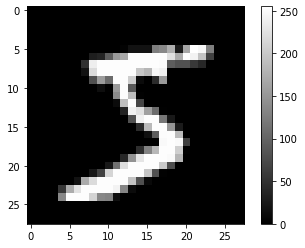

In [44]:
plt.figure()
plt.imshow(train_images[0], cmap = "gray")
plt.colorbar()
plt.grid(False)
plt.show()


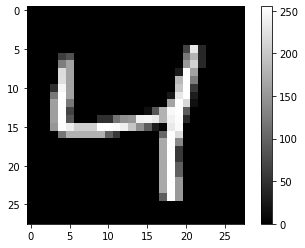

In [45]:
plt.figure()
plt.imshow(train_images[2], cmap = "gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
train_images = train_images / 255.0

test_images = test_images / 255.0


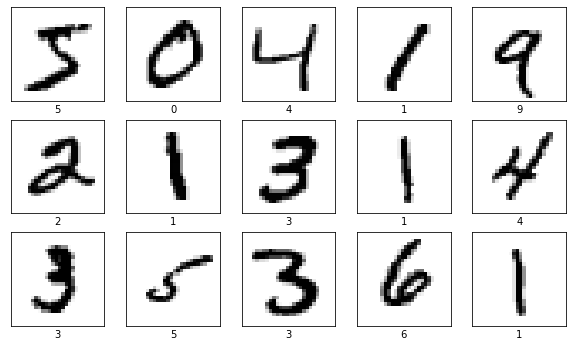

In [47]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
